# Capstone Project

#### Description of the problem:
We are trying to determinate if where to open a new restaurant. We know that most of the customers will get there if the rating of our place is really good, but in order to have a good rate maybe we need to explore some variables like: price, location, and number of rebiews. In a future approach we would like to know with kind of food should we offer. 

We also would like to check if the model is capable to be used in other places of the United States, so we are going to make different kinids of validations, so we maybe capable of identifies the best places to run a new reaturant business.

#### Description of the data:
These data contains: business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, open, categories of food and a serie of attributes. We are going to mainly use the locations coordinates, state, review_count and price. With this we are going to predict the rating. First, we are going to create a model with the whole data and test it. Then we are going to create a model for each city. The final task is going to be comparing with model performs better.

In this project we are going to dive through Yelp Business data. All of the data can be downloaded by the official Yelp Page: https://www.yelp.com/dataset/download. Instead of these, we are going to use the api to construct the model, so if you want to try this code by your own you should register to get your Acces Key Id and tokens.

##### References:
Pagination help: https://github.com/Yelp/yelp-fusion/issues/307

## Data Extraction

In this section we are going to extract the data using the yelp API.

### Importing Libraries and basic parameters

In [338]:
# We use this libraries in this project
import pandas as pd
import numpy as np
import argparse
import json
import pprint
import requests
import sys
import urllib

from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode

API_KEY = "CmCZbCHaDNBjgkeRM5WD71KnZZeG2dsmT_JK96zxl9j6wBP6jTRC4DyIuGInHsODz4ighqMEdZ4wqIqW8iXxn6esZwQBiRpzNTX8GtoQB7cwnbg8Nj10ElKKe77uXnYx"

API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/' 

DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 200

main_data = pd.DataFrame(columns=['name','reviews', 
    'price', 'rating',
    'categories', 'address',
    'city', 'state',
    'latitude','longitude',
    'transactions'])

dict_price={'$':0,
            '$$':1,
            '$$$':2
           }

### Functions used for the extraction
You can check how the Yelp API works here: https://github.com/Yelp/yelp-fusion/tree/master/fusion/python

In [339]:
def request(host, path, api_key, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    
    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

def search(api_key, term, location,offset):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': 50,
        'offset':offset #This parameter works to get more than 50 elements
    }
    
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

def extract_categories(lista):
    category=[]
    for i in range(0,len(lista)):
        cat=lista[i]['title']
        category.append(cat)
    return(';'.join(category))

### Data extraction

In [340]:
DEFAULT_LOCATION=['California','Nevada','Utah','Arizona']
iterations=[50,100,150,200,250,300,350,400,500]
for k in iterations:
    for j in DEFAULT_LOCATION:
        data=search(API_KEY,DEFAULT_TERM,j,k)
        for i in range(0,len(data['businesses'])):    
            business = data['businesses'][i]
            try:
                name = business['name']
            except:
                name = 'NaN'
            try:
                price = float(dict_price[business['price']])
            except:
                price = 'NaN'

            try:
                reviews = float(business['review_count'])
            except:
                reviews = 'NaN'

            try:
                rating = float(business['rating'])
            except:
                rating = 'NaN'

            try:
                categories = extract_categories(business['categories'])
            except:
                categories = 'NaN'

            try:
                location = business['location']
            except:
                location = 'NaN'
            try:
                address = location['address1']
            except:
                address='NaN'
            try:
                city = location['city']
            except:
                city = 'NaN'
            try:
                state = location['zip_code']
            except:
                state='NaN'
            try:
                country = location['country']
            except:
                country='NaN'
            try:
                state = location['state']
            except:
                state='NaN'

            coordinates = business['coordinates']
            try:
                latitude = coordinates['latitude']
                longitude = coordinates['longitude']
            except:
                latitude = 'NaN'
                longitude = 'NaN'

            try:
                transactions = business['transactions']
                transactions = ';'.join(transactions)
            except:
                transactions ='NaN'

            new_columns = {'name':name , 'reviews': reviews, 
                 'price':price, 'rating':rating,
                 'categories':categories, 'address':address,
                 'city':city, 'state':state,
                 'latitude':latitude,'longitude':longitude,
                 'transactions':transactions}

            new_data = pd.DataFrame.from_records([new_columns])

            main_data=main_data.append(new_data,ignore_index=True)


In [342]:
main_data.to_csv('main_data.csv')
main_data.head(5)

name  reviews price  rating  \
0              Embers Restaurant     38.0     2     3.0   
1           Shaver Coffee & Deli     66.0     0     4.0   
2                    Pizza Patio    106.0     1     3.5   
3     Eagle's Landing Restaurant    163.0     1     3.0   
4                Pinehurst Lodge     33.0     1     4.0   
...                          ...      ...   ...     ...   
1795      ProteinHouse - Arcadia    147.0     1     3.5   
1796       Snakes & Lattes Tempe    348.0     1     4.0   
1797  Arizona Wilderness Brewing   1448.0     1     4.0   
1798               India's Flame    203.0     1     4.5   
1799                   Caffe Boa    655.0     1     3.5   

                                             categories  \
0                                           Steakhouses   
1                 Delis;Coffee & Tea;Breakfast & Brunch   
2                                            Bars;Pizza   
3     American (Traditional);Seafood;Breakfast & Brunch   
4                                   American (New);Pubs   
...                                                 ...   
1795  Juice Bars & Smoothies;Health Markets;American...   
1796                               American (New);Cafes   
1797                                  Breweries;Burgers   
1798                                Indian;Bars;Buffets   
1799          American (New);Italian;Breakfast & Brunch   

                      address                    city state   latitude  \
0                 1122 Hwy 41               Fish Camp    CA  37.473075   
1          41758 Tollhouse Rd             Shaver Lake    CA  37.106180   
2       9010 Curry Village Dr  Yosemite National Park    CA  37.737325   
3                5587 Hwy 158               June Lake    CA  37.763726   
4             53783 N Hwy 245               Miramonte    CA  36.697228   
...                       ...                     ...   ...        ...   
1795  3141 E Indian School Rd                 Phoenix    AZ  33.493739   
1796              20 W 6th St                   Tempe    AZ  33.424450   
1797        721 N Arizona Ave                 Gilbert    AZ  33.363010   
1798          4427 S Rural Rd                   Tempe    AZ  33.384479   
1799           398 S Mill Ave                   Tempe    AZ  33.426651   

       longitude     transactions  
0    -119.635428                   
1    -119.319510                   
2    -119.571541                   
3    -119.115958                   
4    -119.014813                   
...          ...              ...  
1795 -112.013594  pickup;delivery  
1796 -111.940932         delivery  
1797 -111.841110  pickup;delivery  
1798 -111.926265  pickup;delivery  
1799 -111.940428  pickup;delivery  

[1800 rows x 11 columns]

# Data Cleaning

In this part we are going to clean the data

In [491]:
corr_data=main_data
corr_data.price = corr_data.price.astype(float)

corr_data = corr_data[main_data.price != 'NaN']
corr_data = corr_data[corr_data.reviews != 'NaN']
corr_data = corr_data[corr_data.rating != 'NaN']
corr_data = corr_data[corr_data.latitude != 'NaN']
corr_data = corr_data[corr_data.longitude != 'NaN']
corr_data = corr_data[corr_data.name != 'NaN']

corr_data=corr_data.dropna()
corr_data

/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


name  reviews  price  rating  \
0              Embers Restaurant     38.0    2.0     3.0   
1           Shaver Coffee & Deli     66.0    0.0     4.0   
2                    Pizza Patio    106.0    1.0     3.5   
3     Eagle's Landing Restaurant    163.0    1.0     3.0   
4                Pinehurst Lodge     33.0    1.0     4.0   
...                          ...      ...    ...     ...   
1795      ProteinHouse - Arcadia    147.0    1.0     3.5   
1796       Snakes & Lattes Tempe    348.0    1.0     4.0   
1797  Arizona Wilderness Brewing   1448.0    1.0     4.0   
1798               India's Flame    203.0    1.0     4.5   
1799                   Caffe Boa    655.0    1.0     3.5   

                                             categories  \
0                                           Steakhouses   
1                 Delis;Coffee & Tea;Breakfast & Brunch   
2                                            Bars;Pizza   
3     American (Traditional);Seafood;Breakfast & Brunch   
4                                   American (New);Pubs   
...                                                 ...   
1795  Juice Bars & Smoothies;Health Markets;American...   
1796                               American (New);Cafes   
1797                                  Breweries;Burgers   
1798                                Indian;Bars;Buffets   
1799          American (New);Italian;Breakfast & Brunch   

                      address                    city state   latitude  \
0                 1122 Hwy 41               Fish Camp    CA  37.473075   
1          41758 Tollhouse Rd             Shaver Lake    CA  37.106180   
2       9010 Curry Village Dr  Yosemite National Park    CA  37.737325   
3                5587 Hwy 158               June Lake    CA  37.763726   
4             53783 N Hwy 245               Miramonte    CA  36.697228   
...                       ...                     ...   ...        ...   
1795  3141 E Indian School Rd                 Phoenix    AZ  33.493739   
1796              20 W 6th St                   Tempe    AZ  33.424450   
1797        721 N Arizona Ave                 Gilbert    AZ  33.363010   
1798          4427 S Rural Rd                   Tempe    AZ  33.384479   
1799           398 S Mill Ave                   Tempe    AZ  33.426651   

       longitude     transactions  
0    -119.635428                   
1    -119.319510                   
2    -119.571541                   
3    -119.115958                   
4    -119.014813                   
...          ...              ...  
1795 -112.013594  pickup;delivery  
1796 -111.940932         delivery  
1797 -111.841110  pickup;delivery  
1798 -111.926265  pickup;delivery  
1799 -111.940428  pickup;delivery  

[1636 rows x 11 columns]

## Data Visualization and descriptive analysis

### Correlation Plot

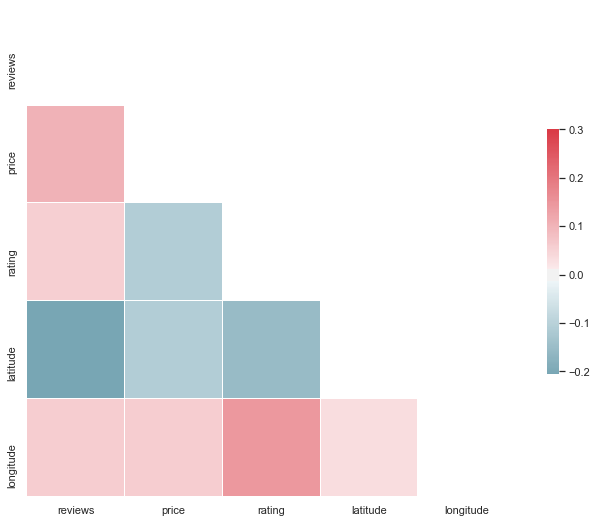

In [480]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

corr_data=corr_data[['name','city','state','reviews','price','rating','latitude','longitude']]
# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Scatter Plot

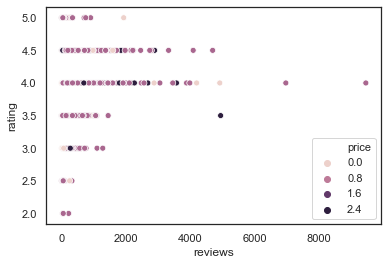

In [345]:
res = sns.scatterplot(corr_data['reviews'],corr_data['rating'],hue=corr_data['price'])
plt.show()

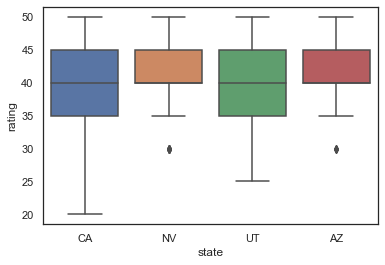

In [580]:
ax = sns.boxplot(x="state", y="rating", data=corr_data)

### Geospatial Plot

In [346]:
import numpy as np
import folium 
import matplotlib.pyplot as plt

In [347]:
loc=[37.782876,-122.470202]
map_2 = folium.Map(location=loc,
zoom_start=12,
tiles='Stamen Terrain')
for i in range(0,len(corr_data)):
    name=corr_data.iloc[i]['name'].replace("'",'')
    cords=[corr_data.iloc[i]['latitude'],corr_data.iloc[i]['longitude']]
    folium.Marker(location=cords,popup=name).add_to(map_2)

map_2

### Locals by city

In [348]:
data_city=corr_data[['city','price','rating','reviews','name']].groupby(['city']).agg({'price':'mean','rating':'mean','reviews':'sum','name':'count'}).reset_index()
data_city = data_city.rename(columns={'price': 'price_avg', 'rating': 'rating_avg','reviews':'reviews_count','name':'locals'})
data_city=data_city[data_city['locals']>50]
data_city.sort_values(by=['rating_avg','reviews_count'], ascending=False)

city  price_avg  rating_avg  reviews_count  locals
67      Scottsdale   1.211538    4.230769        33777.0      52
33       Las Vegas   1.035912    4.143646       304261.0     362
59         Phoenix   0.909091    4.139610       139846.0     308
11          Clovis   0.777778    4.018519        12027.0      54
22          Fresno   0.824176    4.016484        47427.0     182
63  Salt Lake City   0.808594    3.960938        63823.0     256

## Analisis 1: State Clustering

In This section we are going to create clusters for the whole state.

In [349]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [581]:
cluster_data=corr_data[['city','price','reviews','rating']]

In [582]:
cluster_data['numeric_id']=np.arange(len(corr_data))
corr_data['numeric_id']=np.arange(len(corr_data))

/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Normalize the data

In [583]:
X = cluster_data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 2.21927911, -0.67378422, -2.30238706, -1.73099242],
       [-1.84877761, -0.62612886, -0.12447134, -1.728875  ],
       [ 0.18525075, -0.55804977, -1.2134292 , -1.72675758],
       ...,
       [ 0.18525075,  1.72600345, -0.12447134,  1.72675758],
       [ 0.18525075, -0.392958  ,  0.96448652,  1.728875  ],
       [ 0.18525075,  0.37633563, -1.2134292 ,  1.73099242]])

### Modelling

In [585]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 5)
k_means.fit(X)
labels = k_means.labels_

In [586]:
cluster_data["cluster"] = labels

/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [587]:
cluster_data.head()

city  price  reviews  rating  numeric_id  cluster
0               Fish Camp    2.0     38.0      30           0        0
1             Shaver Lake    0.0     66.0      40           1        0
2  Yosemite National Park    1.0    106.0      35           2        0
3               June Lake    1.0    163.0      30           3        0
4               Miramonte    1.0     33.0      40           4        0

In [356]:
cluster_data.pivot_table(columns='cluster', aggfunc={'cluster': 'count'}).reset_index()

cluster    index    0    1    2   3
0        cluster  763  701  157  15

In [357]:
cluster_data.pivot_table(index='city', columns='cluster', aggfunc={'cluster': 'count'}).reset_index().head(5)

city cluster             
cluster                  0    1   2   3
0             Alta     1.0  1.0 NaN NaN
1          Auberry     NaN  1.0 NaN NaN
2         Avondale     NaN  1.0 NaN NaN
3        Bass Lake     NaN  1.0 NaN NaN
4           Bishop     NaN  1.0 NaN NaN

In [588]:
col         = 'cluster'
conditions  = [cluster_data[col] == 0,
               cluster_data[col] == 1,
               cluster_data[col] == 2,
               cluster_data[col] == 3]

choices = [ 'red', 'blue', 'green','pink' ]

cluster_data['color'] = np.select(conditions, choices, default=np.nan)

/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [589]:
cluster_data[['cluster','reviews']].groupby(['cluster']).count().reset_index()

cluster  reviews
0        0      701
1        1      763
2        2       15
3        3      157

In [590]:
cluster_data=pd.merge(cluster_data, corr_data[['numeric_id','longitude','latitude']], on='numeric_id', how='left')
cluster_data['cluster']=cluster_data['cluster'].astype(str)

In [591]:
map3 = folium.Map(location=loc, tiles='CartoDB positron', zoom_start=6)

for i in range(0,len(corr_data)):
    name=cluster_data.iloc[i]['cluster']
    cords=[cluster_data.iloc[i]['latitude'],cluster_data.iloc[i]['longitude']]
    cluster_color=cluster_data.iloc[i]['color']
    folium.Marker(location=cords, 
                  popup=name,
                  icon=folium.Icon(
                        color=cluster_color,
                        icon="beer",
                        prefix='fa'
                            )).add_to(map3)

map3

In [361]:
cluster_data[['cluster','price','reviews','rating','city']].groupby(['cluster','city']).mean().reset_index().sort_values(by=['city'])

cluster                    city     price     reviews    rating
0         0                    Alta  2.000000   44.000000  4.000000
54        1                    Alta  2.000000   25.000000  4.000000
55        1                 Auberry  1.000000    4.000000  3.500000
56        1                Avondale  1.000000   98.000000  5.000000
57        1               Bass Lake  2.000000   40.000000  3.000000
..      ...                     ...       ...         ...       ...
52        0        West Valley City  0.538462   88.461538  3.961538
119       1             Woods Cross  0.500000   81.500000  4.250000
53        0             Woods Cross  1.000000  355.000000  4.000000
120       1  Yosemite National Park  1.000000  176.500000  3.375000
121       1         Yosemite Valley  1.000000   75.000000  2.500000

[135 rows x 5 columns]

In [362]:
cluster_data[['cluster','price','reviews','rating']].groupby(['cluster']).agg({'price':'mean','rating':'mean','reviews':'sum'}).reset_index()

cluster     price    rating   reviews
0       0  0.845347  4.007208  214742.0
1       1  0.952924  4.097004  209751.0
2       2  1.012739  4.121019  217698.0
3       3  1.000000  4.066667   67642.0

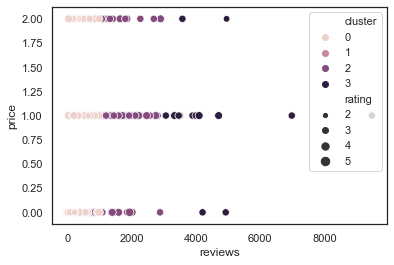

In [363]:
ax = sns.scatterplot(x="reviews", y="price",
                     hue="cluster", size="rating",
                     data=cluster_data)

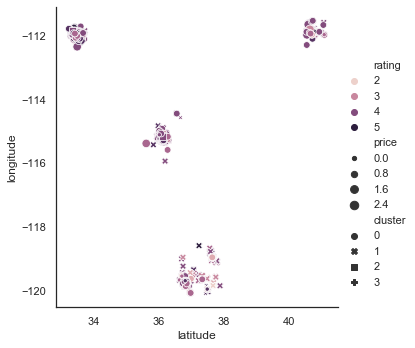

In [364]:
ax = sns.relplot(x="latitude", y="longitude",
                     hue="rating", size="price",
                     style="cluster", kind="scatter",
                     data=cluster_data)

## Modelling

In [451]:
cdf = cluster_data[['price','rating','reviews','latitude','longitude']]
msk = np.random.rand(len(cluster_data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [452]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['price','reviews','latitude','longitude']])
y = np.asanyarray(train[['rating']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['price','reviews','latitude','longitude']])
x = np.asanyarray(test[['price','reviews','latitude','longitude']])
y = np.asanyarray(test[['rating']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-1.26401061e-01  2.18335487e-05 -3.04454066e-02  2.15484673e-02]]
Residual sum of squares: 0.21
Variance score: 0.06


## Analisis 2: City clustering

In [635]:
cluster_2=corr_data[['city','state','latitude','longitude','price','reviews','rating']]
cluster_2['numeric_id']=np.arange(len(corr_data))
cluster_2=cluster_2[cluster_2['state']=='AZ']
cluster_2.head(5)

/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


city state   latitude   longitude  price  reviews  rating  numeric_id
151  Phoenix    AZ  33.596846 -112.064923    2.0    611.0      40         137
152  Phoenix    AZ  33.626831 -112.100300    0.0   1859.0      40         138
153  Phoenix    AZ  33.470650 -112.029880    1.0    160.0      45         139
154  Phoenix    AZ  33.583135 -111.977675    1.0    725.0      45         140
155  Phoenix    AZ  33.525622 -112.064660    1.0     38.0      45         141

In [636]:
cluster_2=cluster_2.drop(columns=['state'])
cluster_2=cluster_2[cluster_2['price']!=0]

## Modelling

In [638]:
X = cluster_2.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 5)
k_means.fit(X)
labels = k_means.labels_
cluster_2["cluster"] = labels

In [639]:
col         = 'cluster'
conditions  = [cluster_2[col] == 0,
               cluster_2[col] == 1,
               cluster_2[col] == 2,
               cluster_2[col] == 3]

choices = [ 'red', 'blue', 'green','orange' ]

cluster_2['color'] = np.select(conditions, choices, default=np.nan)
cluster_2['cluster']=cluster_2['cluster'].astype(str)
cluster_2.head()

city   latitude   longitude  price  reviews  rating  numeric_id  \
151  Phoenix  33.596846 -112.064923    2.0    611.0      40         137   
153  Phoenix  33.470650 -112.029880    1.0    160.0      45         139   
154  Phoenix  33.583135 -111.977675    1.0    725.0      45         140   
155  Phoenix  33.525622 -112.064660    1.0     38.0      45         141   
156  Phoenix  33.447796 -112.070211    2.0    196.0      40         142   

    cluster color  
151       1  blue  
153       1  blue  
154       1  blue  
155       1  blue  
156       1  blue

In [640]:
cluster_2[['cluster','reviews']].groupby(['cluster']).count().reset_index()

cluster  reviews
0       0      182
1       1      153
2       2       31

In [641]:
loc=[cluster_2['latitude'].mean(),cluster_2['longitude'].mean()]

map4 = folium.Map(location=loc, tiles='CartoDB positron', zoom_start=6)

for i in range(0,len(cluster_2)):
    name=str('The reviews are: ')+str(cluster_2.iloc[i]['reviews'])+str(' and rating is: ')+str(cluster_2.iloc[i]['rating'])+str(' and is from cluster: ')+str(cluster_2.iloc[i]['cluster'])
    cords=[cluster_2.iloc[i]['latitude'],cluster_2.iloc[i]['longitude']]
    cluster_color=cluster_2.iloc[i]['color']
    folium.Marker(location=cords, 
                  popup=name,
                  icon=folium.Icon(
                        color=cluster_color,
                        icon="beer",
                        prefix='fa'
                            )).add_to(map4)

map4


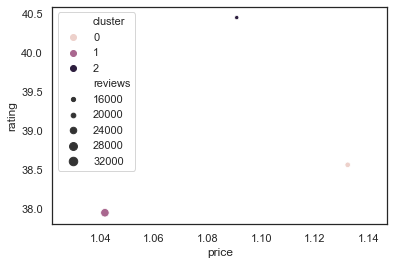

In [643]:
ax = sns.scatterplot(x="price", y="rating",
                     hue="cluster", size="reviews",
                     data=ads)

In [644]:
cluster_2[['cluster','price','reviews','rating']].groupby(['cluster']).agg({'price':'mean','rating':'mean','reviews':'sum'}).reset_index()

cluster     price     rating  reviews
0       0  1.104396  41.071429  64527.0
1       1  1.104575  42.091503  66821.0
2       2  1.064516  40.967742  48181.0

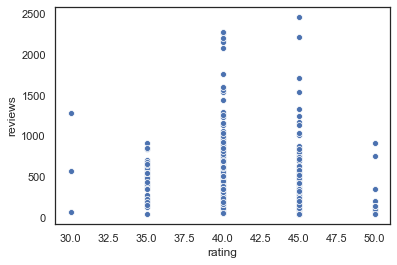

In [645]:
ax = sns.scatterplot(x="rating", y="reviews", data=cluster_2)

In [646]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

cdf = cluster_2[['price','rating','reviews','latitude','longitude']]
msk = np.random.rand(len(cluster_2)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Multiple Regresion

In [647]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['price','reviews','latitude','longitude']])
y = np.asanyarray(train[['rating']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
y_hat= regr.predict(test[['price','reviews','latitude','longitude']])
x = np.asanyarray(test[['price','reviews','latitude','longitude']])
y = np.asanyarray(test[['rating']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[-7.31261473e-01 -1.50879128e-03  3.76237395e+00  5.95098308e+00]]
Residual sum of squares: 12.59
Variance score: -0.04


In [522]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

In [648]:
#cluster_2['rating']=(cluster_2['rating']*10).astype(int)
X = np.asarray(cluster_2[['reviews','longitude']])
y = np.asarray(cluster_2['rating'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=8)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [649]:
yhat = clf.predict(X_test)

In [650]:
yhat

array([40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40])

In [547]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [651]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

          35       0.00      0.00      0.00        18
          40       0.44      1.00      0.61        57
          45       0.00      0.00      0.00        52
          50       0.00      0.00      0.00         2

    accuracy                           0.44       129
   macro avg       0.11      0.25      0.15       129
weighted avg       0.20      0.44      0.27       129



/Users/cristianvildosola/miniconda3/envs/forecast/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [661]:
df2 = pd.DataFrame(
    np.array([['CA',0.42,0.96,0.59,30.17,0.03],
              ['NV',0.49,1,0.66,20.44,-0.03],
              ['UT',0.39,1,0.56,11.77,0.02],
              ['AZ',0.44,1,0.61,12.59,-0.04]]),
    columns=['STATE','PRECISION', 'RECALL','F1-SCORE','RSS','VARIANCE_SCORE'])

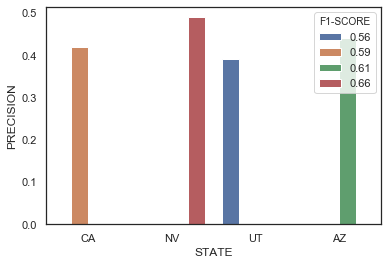

In [665]:
ax = sns.barplot(x="STATE", y="PRECISION", hue="F1-SCORE", data=df2)

In [666]:
df2

STATE PRECISION RECALL F1-SCORE    RSS VARIANCE_SCORE
0    CA      0.42   0.96     0.59  30.17           0.03
1    NV      0.49      1     0.66  20.44          -0.03
2    UT      0.39      1     0.56  11.77           0.02
3    AZ      0.44      1     0.61  12.59          -0.04